# k-최근접 이웃 알고리즘

#어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용.

#새로운 데이터에 대해 예측할 때, 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기만 하면 됨.

#데이터를 모두 가지고 있어야 함.

#데이터가 아주 많은 경우 메모리가 많이 필요하고 직선거리 계산에 많은 시간 요구.

## Project : 도미와 빙어를 분류하는 모델을 만들고자 한다.

In [1]:
#도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

도미와 빙어를 scatter plot으로 나타내기

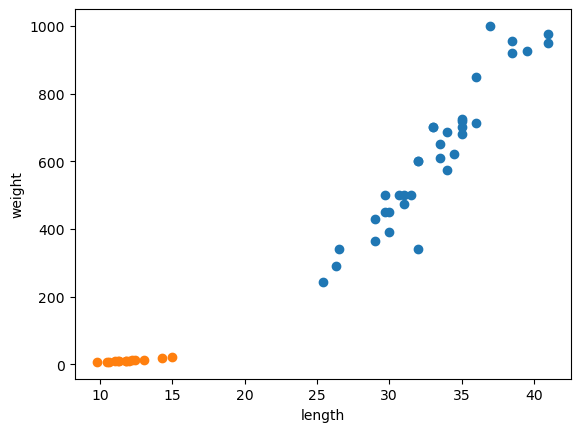

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

#zip 함수로 length와 weight의 원소 하나씩 꺼내기
fish_data = [[l,w] for l, w in zip(length, weight)]

#도미는 1로, 빙어는 0으로
fish_target = [1] * 35 + [0] * 14

In [4]:
from sklearn.neighbors import KNeighborsClassifier #k-최근접 이웃 알고리즘을 구현한 클래스

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target) #training

KNeighborsClassifier()

In [5]:
kn.score(fish_data, fish_target)
#0~1 사이의 값 반환. 0.5라면 절반을 맞췄다는 소리.

C:\Users\kyc36\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

주어진 데이터를 모두 Train set 및 Test set으로 사용하였기 때문에 정확도를 나타내는 "kn.score"를 하였을 때 1이 나올 수 밖에 없다.

## Train set과 Test set 나누기

In [6]:
kn1 = KNeighborsClassifier()

In [7]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

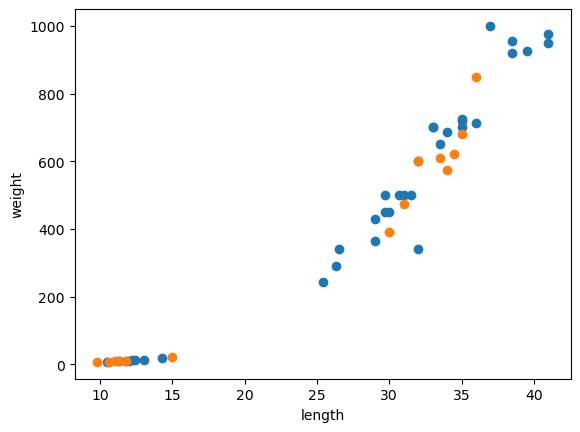

In [8]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

numpy를 이용하여 적절하게 섞은 후 Train / Test set을 나누었다.

In [9]:
kn1.fit(train_input, train_target)
kn1.score(test_input, test_target)

C:\Users\kyc36\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

Train set으로 fitting 하고 test set으로 score를 측정하였을때, 그 값은 1로 100% 정확도를 가지는 것을 알 수 있다.

# 데이터 전처리

### k-최근접 이웃 알고리즘은 새로운 데이터에 대해 예측할 때, 가장 가까운 직선거리에 어떤 데이터가 있는지를 살피기 때문에, 시각적으로 더 쉽게 알아 보기 위해 scatter plot을 그렸을때 나타나는 X와 Y축의 범위를 통일시켜 줄 필요가 있다.

In [10]:
#도미 + 빙어
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [11]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [12]:
kn2=KNeighborsClassifier()
kn2.fit(train_input, train_target)

KNeighborsClassifier()

### 아래 plot은 데이터 전처리 하기 전, 새로운 데이터(세모)를 추가하였을 때의 scatter plot의 결과이다.

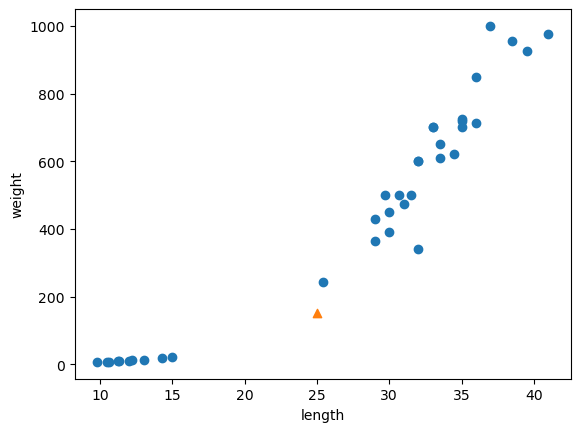

In [13]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

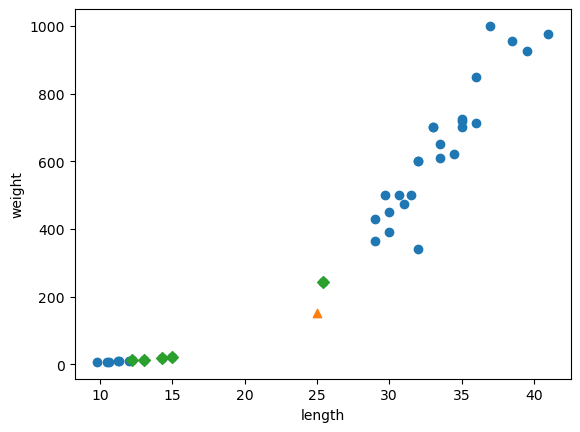

In [14]:
distances, indexes = kn2.kneighbors([[25,150]])

plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 세모에 해당하는 데이터와 거리가 가장 가까운 5개의 데이터가 마름모로 표시된 데이터들이다. 
### 한눈에 봤을때 직관적으로 이해가 되지 않는데, 이는 그래프의 X와 Y축의 범위가 통일되지 않았기 때문이다.

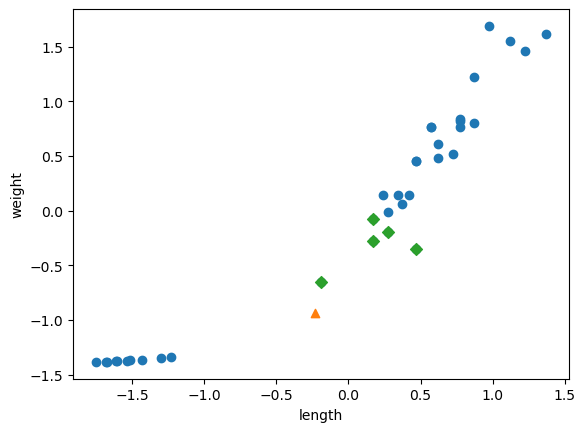

In [15]:
mean = np.mean(train_input,axis=0)
std = np.std(train_input, axis=0)

train_scaled = (train_input - mean)/std
new = ([25,150]-mean)/std

kn.fit(train_scaled, train_target)
test_scaled = (test_input-mean)/std

distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### X와 Y의 범위를 통일해 준 후의 scatter plot이다. 마름모에 해당하는 데이터들이 세모와 가장 가까운 데이터들이다.
(여기서 가깝다는 것은, 직선상의 거리가 가깝다는 의미이다.)